# Fashion MNIST Generative Modeling using  Gaussian Mixtures

Generating images from the fashion MNIST dataset using a Gaussian Mixture Model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import tensorflow as tf

In [2]:
(X,y),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

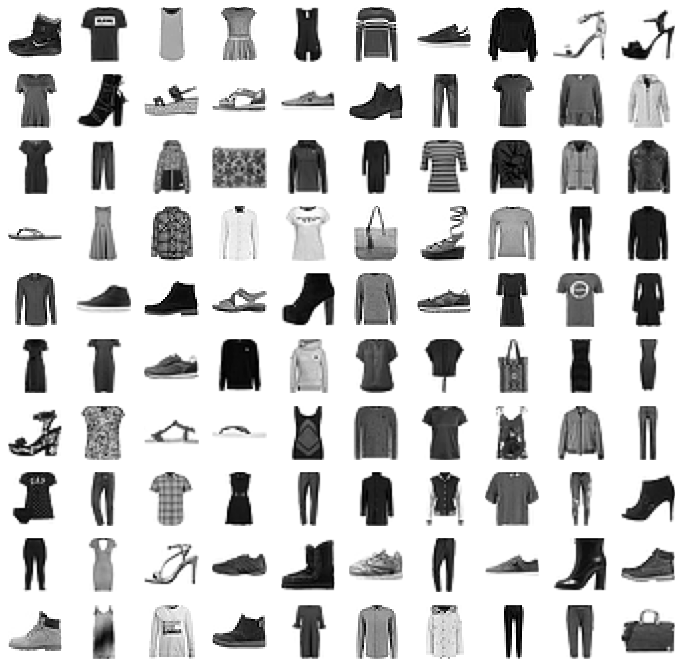

In [3]:
# function to plot 100 images
def plot_fashion(dataset):
    fig,axes = plt.subplots(10,10, figsize=(12,12),subplot_kw = dict(xticks=[],yticks=[]))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(dataset[i,:,:], cmap = 'binary')
        
        
plot_fashion(X[:100,:,:])

In [16]:
# finding the number of components to use using AIC

from sklearn.mixture import GaussianMixture

n_components = np.arange(100)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0)
         for n in n_components]
#aics = [model.fit(X.reshape(60000,784)).aic(X.reshape(60000,784)) for model in models]

from tqdm import tqdm

aics = []
for model in tqdm(models):
    aics.append(model.fit(X[:2000,:,:].reshape(2000,784)).aic(X[:2000,:,:].reshape(2000,784)))
plt.plot(n_components, aics)



  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

  5%|████▏                                                                              | 1/20 [00:34<10:51, 34.27s/it]

 10%|████████▎                                                                          | 2/20 [01:15<10:56, 36.47s/it]

 15%|████████████▍                                                                      | 3/20 [02:15<12:19, 43.48s/it]

 20%|████████████████▌                                                                  | 4/20 [03:16<12:58, 48.68s/it]

 25%|████████████████████▊                                                              | 5/20 [04:18<13:08, 52.57s/it]

 30%|████████████████████████▉                                                          | 6/20 [05:20<12:58, 55.61s/it]

 35%|█████████████████████████████                                                      | 7/20 [06:27<12:44, 58.77s/it]

 40%|█████████████████████████

MemoryError: 

In [12]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(10, covariance_type = 'full', random_state = 42)

model.fit(X[:500,:,:].reshape(500,784))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

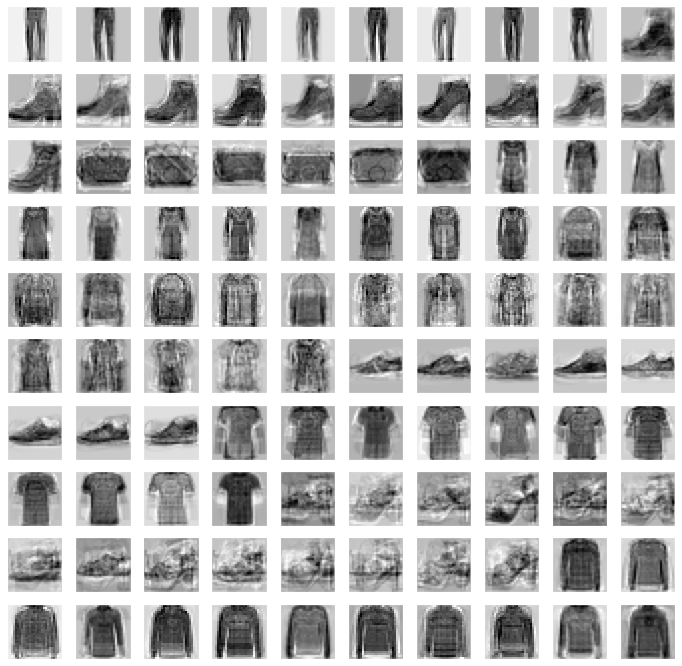

In [13]:
generated_data = model.sample(100)

plot_fashion(generated_data[0].reshape(100,28,28))

In [14]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(50, covariance_type = 'full', random_state = 42)

model.fit(X[:500,:,:].reshape(500,784))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=50, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

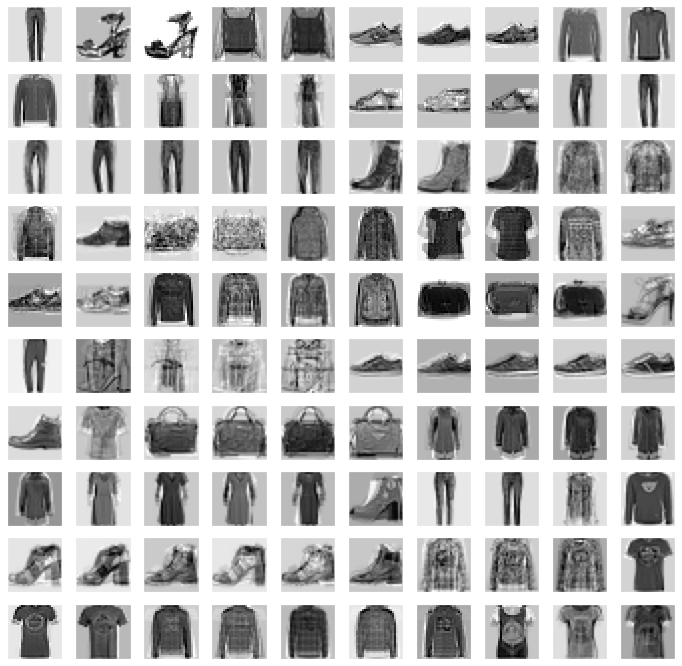

In [15]:
generated_data = model.sample(100)

plot_fashion(generated_data[0].reshape(100,28,28))

In [16]:
model = GaussianMixture(20, covariance_type = 'full', random_state = 42)

model.fit(X[:500,:,:].reshape(500,784))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

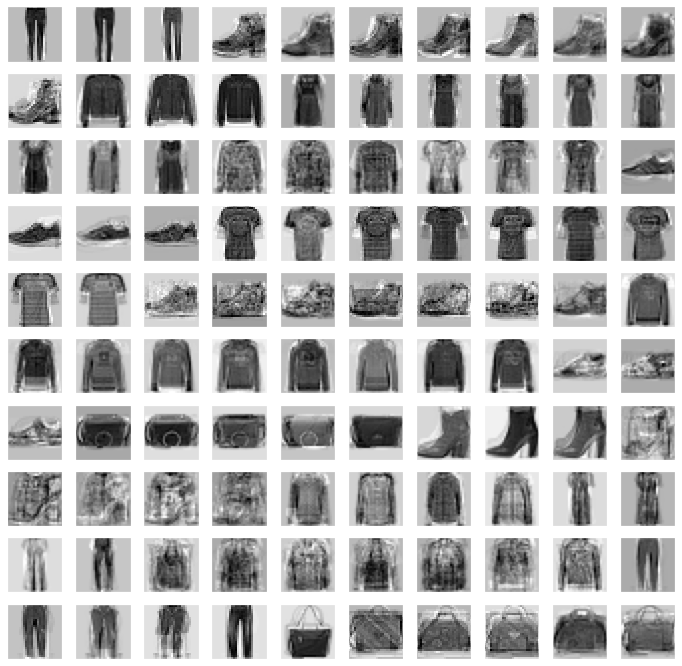

In [17]:
generated_data = model.sample(100)

plot_fashion(generated_data[0].reshape(100,28,28))

In [20]:
model = GaussianMixture(20, covariance_type = 'full', random_state = 42)

model.fit(X[:50,:,:].reshape(50,784))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

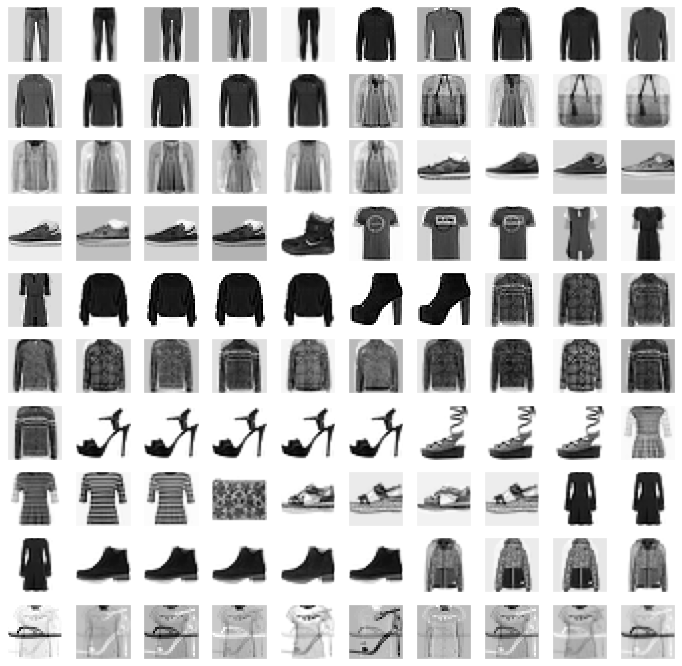

In [21]:
generated_data = model.sample(100)

plot_fashion(generated_data[0].reshape(100,28,28))

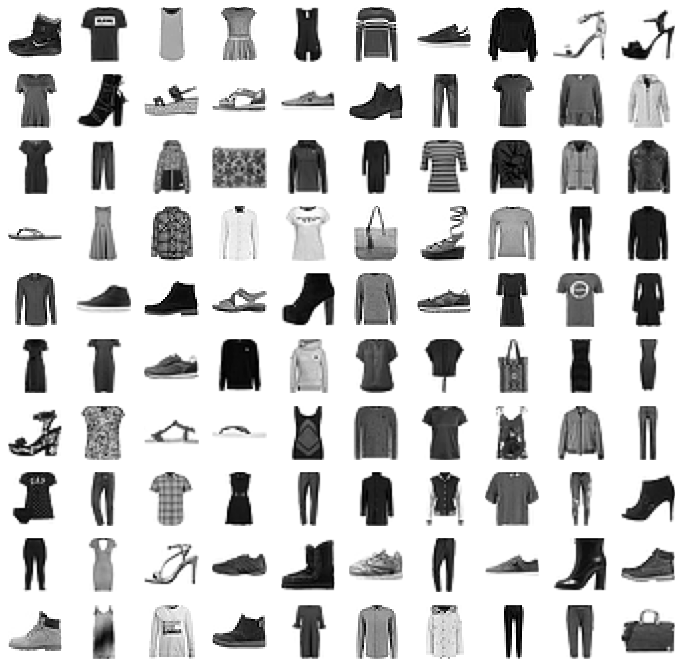

In [28]:
plot_fashion(X[:100,:,:])

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Generated data with 5 component Gaussian


 25%|█████████████████████                                                               | 1/4 [00:03<00:09,  3.18s/it]

Generated data with 10 component Gaussian


 50%|██████████████████████████████████████████                                          | 2/4 [00:06<00:06,  3.30s/it]

Generated data with 15 component Gaussian


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:11<00:03,  3.83s/it]

Generated data with 20 component Gaussian


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.63s/it]


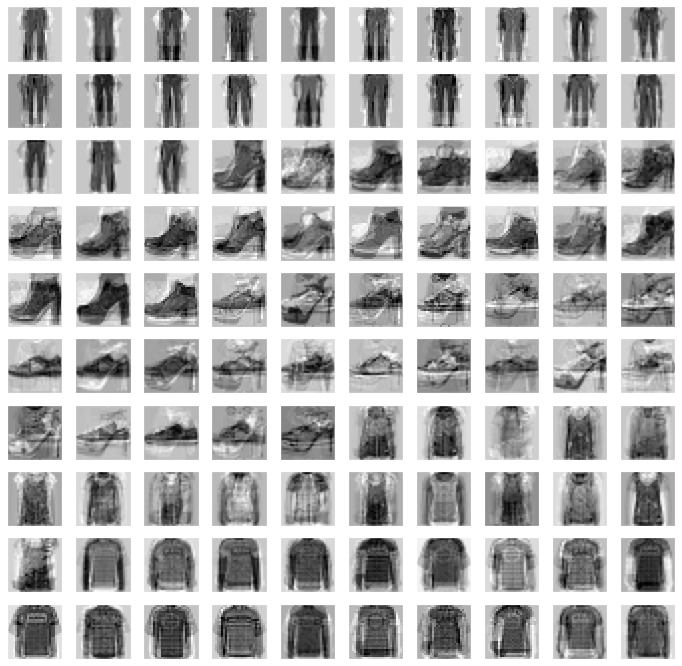

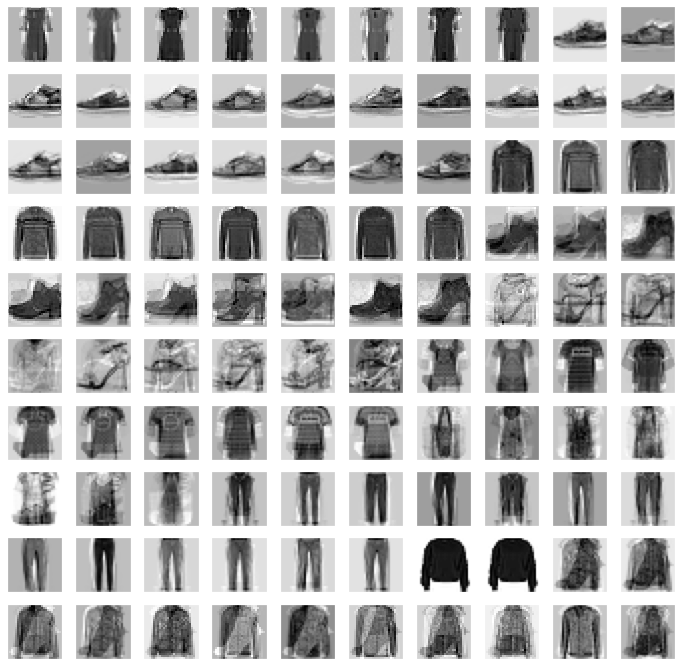

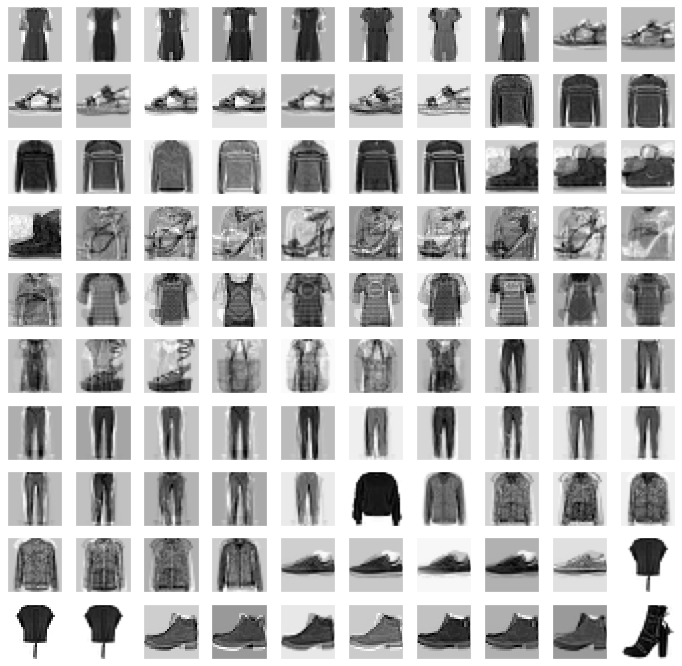

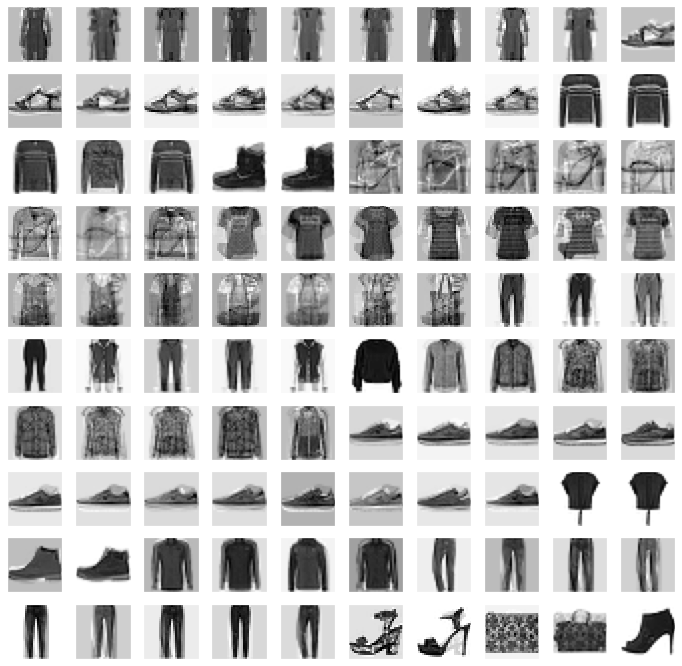

In [27]:
# training data : First 100 samples 
# n_components = 5,10,15,2
from tqdm import tqdm

n_components = np.arange(5,25,5)

models = [GaussianMixture(n, covariance_type = 'full', random_state = 42) for n in n_components]

for model in tqdm(models):
    model.fit(X[:100,:,:].reshape(100,784))
    generated_data = model.sample(100)
    print(f"Generated data with {model.n_components} component Gaussian")
    plot_fashion(generated_data[0].reshape(100,28,28))
    

In [34]:
model = GaussianMixture(400, covariance_type = 'full', random_state = 42)

model.fit(X[:3000,:,:].reshape(3000,784))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=400, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

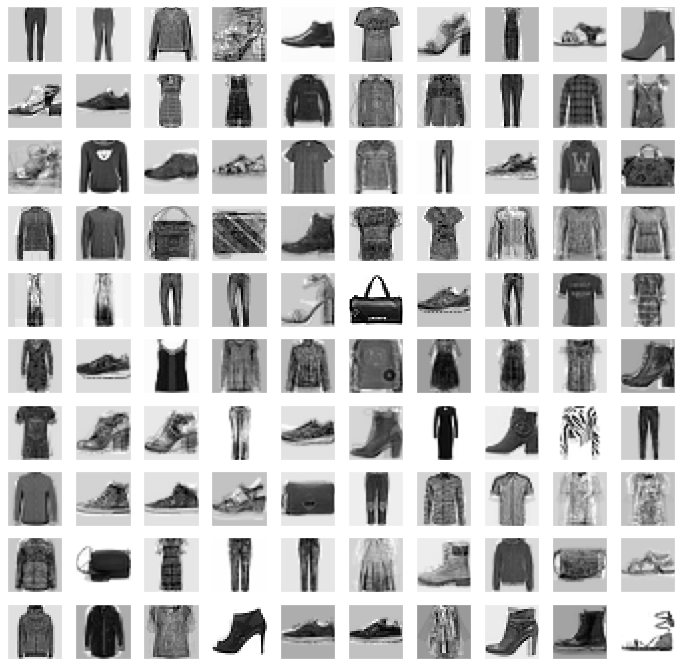

In [35]:
generated_data = model.sample(100)

plot_fashion(generated_data[0].reshape(100,28,28))